# Классификация - и снова в бой!


Сегодня мы поговорим о том, чему же мы научились за последние практики?

Мы освоили основным методы работы как с данными, на основе которых можно решить задачу классификации, так и с моделями, которые это делают! Щикарррно!

Сегодняшняя задачка как всегда несложная, но очень важная - нам предстоит предсказывать болезни сердца!

В вашем распоряжении датасет [Heart Disease UCI](https://www.kaggle.com/datasets/cherngs/heart-disease-cleveland-uci). Ваша задача предсказать, есть ли у человека заболевание сердца или нет.

Как всегда, ждем от вас полноценного анализа исходных данных, подготовка необходимой предобработки, feature engineering и поиск лучшего варианта, которный даст наибольшую метрику!

* Задача под звездочкой. Попробуйте реализовать такую систему, которая реже пропускает больных пациентов - мы ведь не хотим больным людям говорить, что они здоровы, хотя это не так?

Мы желаем вам удачи - постарайтесь применить все накопленные знания и, может, чуть больше! Успехов!

In [1]:
# Зафиксируем состояние случайных чисел
import numpy as np
import random
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
random.seed(RANDOM_SEED)

In [2]:
df_src = pd.read_csv('heart_cleveland_upload.csv')
print(df_src.info)

<bound method DataFrame.info of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     69    1   0       160   234    1        2      131      0      0.1   
1     69    0   0       140   239    0        0      151      0      1.8   
2     66    0   0       150   226    0        0      114      0      2.6   
3     65    1   0       138   282    1        2      174      0      1.4   
4     64    1   0       110   211    0        2      144      1      1.8   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
292   40    1   3       152   223    0        0      181      0      0.0   
293   39    1   3       118   219    0        0      140      0      1.2   
294   35    1   3       120   198    0        0      130      1      1.6   
295   35    0   3       138   183    0        0      182      0      1.4   
296   35    1   3       126   282    0        2      156      1      0.0   

     slope  ca  thal  condition  
0        1   1     0 

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
train_data, test_data = train_test_split(df_src, test_size=0.3, stratify=df_src['condition'],shuffle=True, random_state=RANDOM_SEED)
print(f"Train/test shapes: {train_data.shape}, {test_data.shape} \n")

def predict_threshold(y_probs, treshold):
    mask = y_probs[:,1] > treshold
    return 1*mask
    
def get_xy_data(df:pd.DataFrame, target_col):
    x = df.copy()
    y = x.pop(target_col)
    return x, y

x_train, y_train = get_xy_data(train_data, 'condition')
x_test, y_test = get_xy_data(test_data, 'condition')


Train/test shapes: (207, 14), (90, 14) 



In [21]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=RANDOM_SEED)

model.fit(x_train, y_train)
y_pred = model.predict(x_test)

c:\Users\dante\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
def CM(test_y, pred_y):
    rec=recall_score(test_y,pred_y, average='binary',pos_label=1)
    prec=precision_score(test_y,pred_y)
    f1=f1_score(test_y, pred_y)
    accuracy = accuracy_score(test_y,pred_y)
    dict = {
        'recall' : rec,
        'precision' : prec,
        'f1' : f1,
        'accuracy': accuracy
    }
    return dict
metrics = CM(y_test, y_pred)
print(metrics)

{'recall': 0.8095238095238095, 'precision': 0.9444444444444444, 'f1': 0.8717948717948718, 'accuracy': 0.8888888888888888}


In [28]:
y_prob = model.predict_proba(x_test)
y_pred_new = predict_threshold(y_prob, 0.6)
test_metrics = CM(y_test, y_pred_new)
test_metrics

{'recall': 0.7619047619047619,
 'precision': 0.9411764705882353,
 'f1': 0.8421052631578947,
 'accuracy': 0.8666666666666667}

[0.56       0.55405405 0.56164384 0.56944444 0.56338028 0.57142857
 0.57971014 0.58823529 0.59701493 0.60606061 0.61538462 0.625
 0.63492063 0.64516129 0.6557377  0.66666667 0.66101695 0.67241379
 0.68421053 0.69642857 0.70909091 0.72222222 0.71698113 0.73076923
 0.7254902  0.74       0.75510204 0.77083333 0.76595745 0.7826087
 0.8        0.81818182 0.8372093  0.85714286 0.87804878 0.875
 0.8974359  0.89473684 0.91891892 0.94444444 0.94285714 0.94117647
 0.96969697 0.96875    0.96774194 0.96666667 0.96551724 0.96428571
 0.96296296 0.96153846 0.96       0.95833333 0.95652174 0.95454545
 0.95238095 0.95       0.94736842 0.94444444 0.94117647 0.9375
 0.93333333 0.92857143 0.92307692 1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.        ]
[1.         0.97619048 0.97619048 0.97619048 0.95238095 0.95238095
 0.95238095 0.95238095 0.95238095 0.95238095 0.95238095 0.95238095
 0.95238095 0.95238095 0.95238095 0.95238095 0.

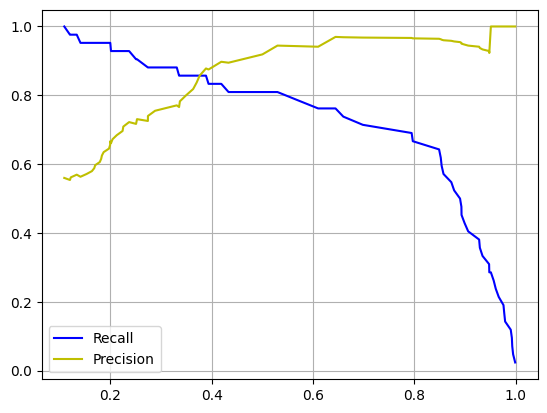

In [54]:
from sklearn import metrics
from sklearn.metrics import precision_recall_curve

precision, recall, threshold = precision_recall_curve(y_test, y_prob[:,1])

print(precision)
print(recall)
plt.plot(threshold, recall[0:-1],'b',label='Recall')
plt.plot(threshold, precision[0:-1],'y',label='Precision')
plt.grid()
plt.legend()
plt.show()


Из рисунка видно, что пересечение в порге примерно около 0.4. Выберем 0.3 как нужный порог поскольку там recall имеет высокое значение

In [58]:
y_prob = model.predict_proba(x_test)
y_pred_new = predict_threshold(y_prob, 0.3)
test_metrics = CM(y_test, y_pred_new)
test_metrics

{'recall': 0.8809523809523809,
 'precision': 0.7708333333333334,
 'f1': 0.8222222222222222,
 'accuracy': 0.8222222222222222}

Таким образом получилось:

Метрики до обработки {'recall': 0.809, 'precision': 0.944, 'f1': 0.871, 'accuracy': 0.888} 

Метрики после {'recall': 0.88, 'precision': 0.77, 'f1': 0.822, 'accuracy': 0.822}